In [1]:
from Feature_Extraction import *
from threading import Thread
import concurrent.futures as conc
import cv2
import os
import math
import dlib
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# loading the dataset for training models
original_dataset_df = pd.read_csv('real_videos_features_vector.csv', index_col=None)
fake_dataset_1_df = pd.read_csv('fake_videos_features_vector_0.csv', index_col=None)
fake_dataset_2_df = pd.read_csv('fake_videos_features_vector_1.csv', index_col=None)
fake_dataset_3_df = pd.read_csv('fake_videos_features_vector_2.csv', index_col=None)
fake_dataset_4_df = pd.read_csv('fake_videos_features_vector_3.csv', index_col=None)

In [21]:
# preprocessing
original_dataset_df.drop('Unnamed: 0', inplace=True, axis=1)
fake_dataset_1_df.drop('Unnamed: 0', inplace=True, axis=1)
fake_dataset_2_df.drop('Unnamed: 0', inplace=True, axis=1)
fake_dataset_3_df.drop('Unnamed: 0', inplace=True, axis=1)
fake_dataset_4_df.drop('Unnamed: 0', inplace=True, axis=1)
fake_dataset_1_df['Label'] = 1
fake_dataset_2_df['Label'] = 1
fake_dataset_3_df['Label'] = 1
fake_dataset_4_df['Label'] = 1

### Creating Models

In [34]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [123]:
model_1 = pd.concat([original_dataset_df, fake_dataset_1_df]).reset_index(drop=True)
model_2 = pd.concat([original_dataset_df, fake_dataset_2_df]).reset_index(drop=True)
model_3 = pd.concat([original_dataset_df, fake_dataset_3_df]).reset_index(drop=True)
model_4 = pd.concat([original_dataset_df, fake_dataset_4_df]).reset_index(drop=True)

<Axes: >

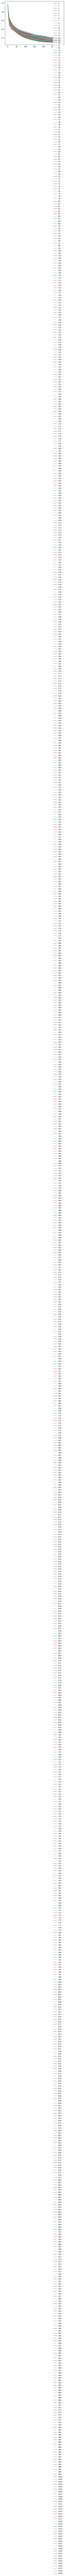

In [126]:
original_dataset_df.drop(['Label'], axis=1).T.plot()

<Axes: >

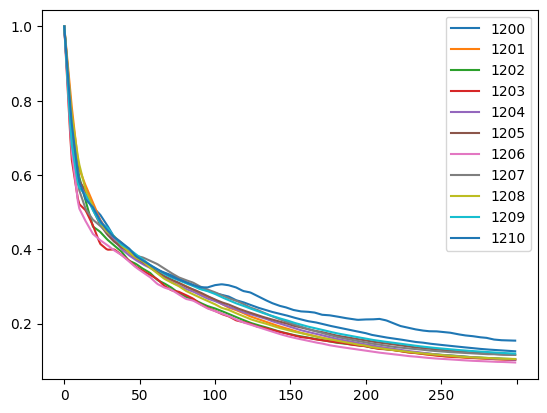

In [122]:
model_2.drop(['Label'], axis=1).loc[1200:1210].T.plot()

In [40]:
# split training data
x_train, x_test, y_train, y_test = train_test_split(model_1.drop(['Label'], axis=1), model_1['Label'], test_size=0.2, random_state=42)

In [78]:
svm_model = svm.SVC(kernel='rbf')
model = svm_model.fit(x_train, y_train)

In [79]:
y_predicted = model.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print(accuracy_score(list(y_test), y_predicted))

0.5686274509803921


In [82]:
# split training data
x_train, x_test, y_train, y_test = train_test_split(model_2.drop(['Label'], axis=1), model_1['Label'], test_size=0.2, random_state=42)

In [83]:
svm_model = svm.SVC(kernel='rbf')
model = svm_model.fit(x_train, y_train)

In [84]:
y_predicted = model.predict(x_test)

In [85]:
print(accuracy_score(list(y_test), y_predicted))

0.5735294117647058


In [86]:
# split training data
x_train, x_test, y_train, y_test = train_test_split(model_3.drop(['Label'], axis=1), model_1['Label'], test_size=0.2, random_state=42)

In [87]:
svm_model = svm.SVC(kernel='rbf')
model = svm_model.fit(x_train, y_train)

In [88]:
y_predicted = model.predict(x_test)

In [89]:
print(accuracy_score(list(y_test), y_predicted))

0.625


In [90]:
# split training data
x_train, x_test, y_train, y_test = train_test_split(model_4.drop(['Label'], axis=1), model_1['Label'], test_size=0.2, random_state=42)

In [91]:
svm_model = svm.SVC(kernel='rbf')
model = svm_model.fit(x_train, y_train)

In [92]:
y_predicted = model.predict(x_test)

In [93]:
print(accuracy_score(list(y_test), y_predicted))

0.5686274509803921
